<a href="https://colab.research.google.com/github/NeelNakrani/Classification-example/blob/main/Classification_Glioma_Grading_Clinical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetch Dataset

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759)

# data (as pandas dataframes)
X = glioma_grading_clinical_and_mutation_features.data.features
y = glioma_grading_clinical_and_mutation_features.data.targets

# metadata
print(glioma_grading_clinical_and_mutation_features.metadata)

# variable information
print(glioma_grading_clinical_and_mutation_features.variables)

{'uci_id': 759, 'name': 'Glioma Grading Clinical and Mutation Features', 'repository_url': 'https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/759/data.csv', 'abstract': 'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading 

## Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
X.head()

Gender  Age_at_diagnosis   Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0       0             51.30  white     1     0     0     0     0    0      0   
1       0             38.72  white     1     0     0     0     0    1      0   
2       0             35.17  white     1     1     1     0     0    0      0   
3       1             32.78  white     1     1     1     0     0    0      1   
4       0             31.51  white     1     1     1     0     0    0      0   

   ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0  ...      1    0       0     0      0        0       0     0     0       0  
1  ...      0    0       0     0      0        0       0     0     0       0  
2  ...      0    0       0     0      0        0       0     0     0       0  
3  ...      0    0       0     0      0        0       0     0     1       0  
4  ...      0    0       0     0      0        0       0     0     0       0  

[5 rows x 23 columns]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            839 non-null    int64  
 1   Age_at_diagnosis  839 non-null    float64
 2   Race              839 non-null    object 
 3   IDH1              839 non-null    int64  
 4   TP53              839 non-null    int64  
 5   ATRX              839 non-null    int64  
 6   PTEN              839 non-null    int64  
 7   EGFR              839 non-null    int64  
 8   CIC               839 non-null    int64  
 9   MUC16             839 non-null    int64  
 10  PIK3CA            839 non-null    int64  
 11  NF1               839 non-null    int64  
 12  PIK3R1            839 non-null    int64  
 13  FUBP1             839 non-null    int64  
 14  RB1               839 non-null    int64  
 15  NOTCH1            839 non-null    int64  
 16  BCOR              839 non-null    int64  
 1

In [8]:
y.head()

Grade
0      0
1      0
2      0
3      0
4      0

In [9]:
y.value_counts()

Grade
0        487
1        352
dtype: int64

In [10]:
X.drop('Race', axis=1, inplace=True)

<ipython-input-10-d3d720644213>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Race', axis=1, inplace=True)


In [11]:
X.shape

(839, 22)

In [12]:
y.shape

(839, 1)

In [13]:
cols = X.columns

In [14]:
dataset = pd.concat([X, y], axis=1)

In [15]:
dataset.head()

Gender  Age_at_diagnosis  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  PIK3CA  \
0       0             51.30     1     0     0     0     0    0      0       1   
1       0             38.72     1     0     0     0     0    1      0       0   
2       0             35.17     1     1     1     0     0    0      0       0   
3       1             32.78     1     1     1     0     0    0      1       0   
4       0             31.51     1     1     1     0     0    0      0       0   

   ...  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  Grade  
0  ...    0       0     0      0        0       0     0     0       0      0  
1  ...    0       0     0      0        0       0     0     0       0      0  
2  ...    0       0     0      0        0       0     0     0       0      0  
3  ...    0       0     0      0        0       0     0     1       0      0  
4  ...    0       0     0      0        0       0     0     0       0      0  

[5 rows x 23 columns]

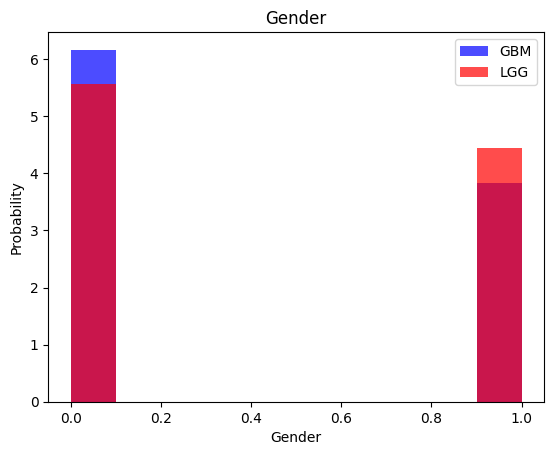

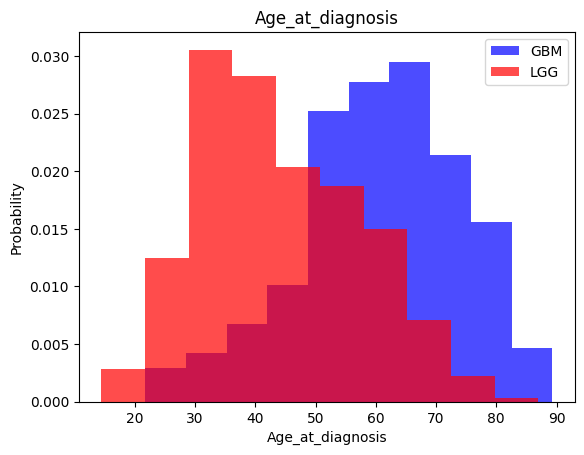

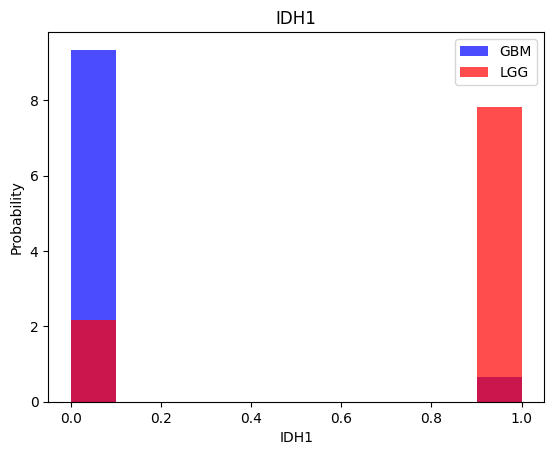

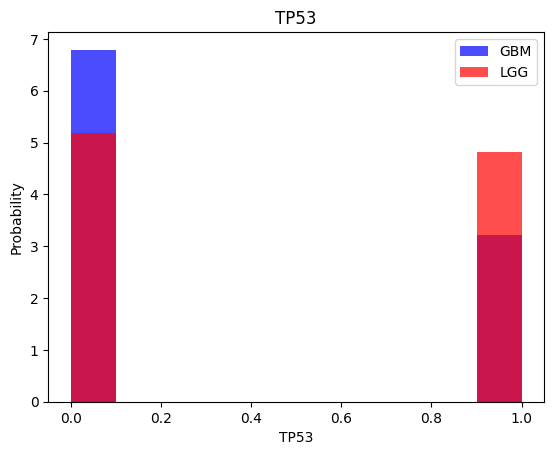

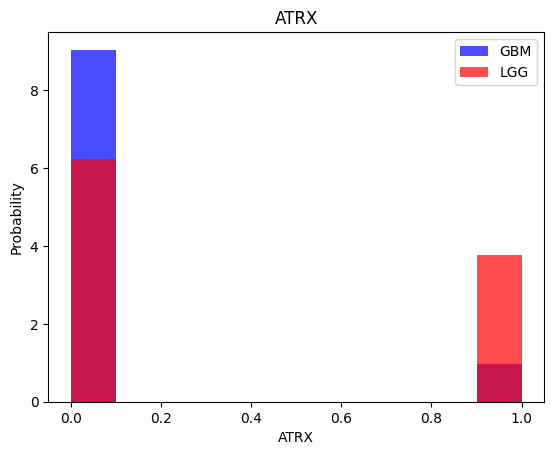

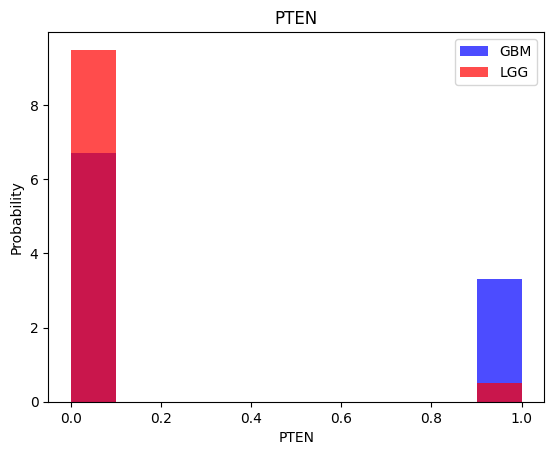

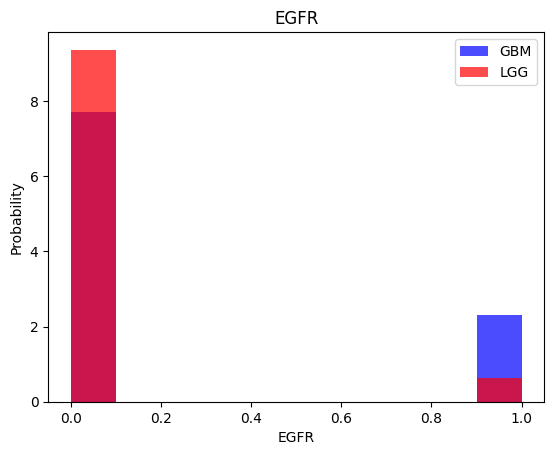

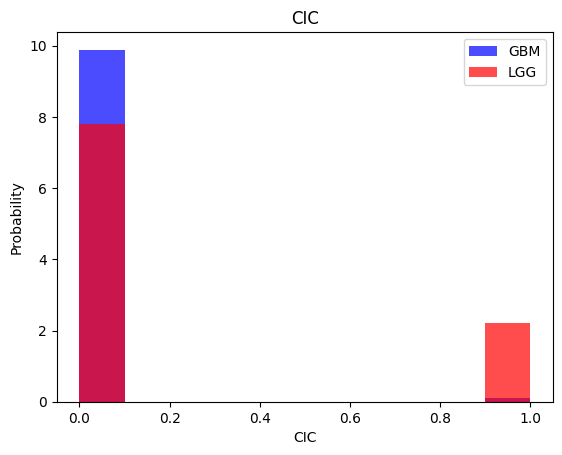

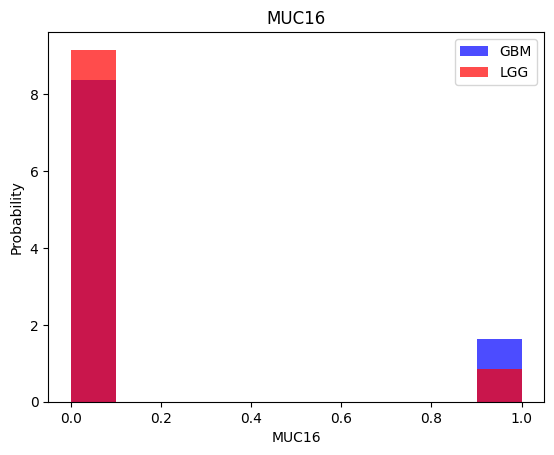

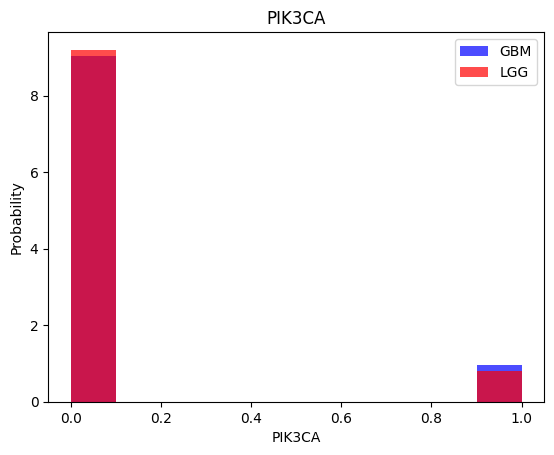

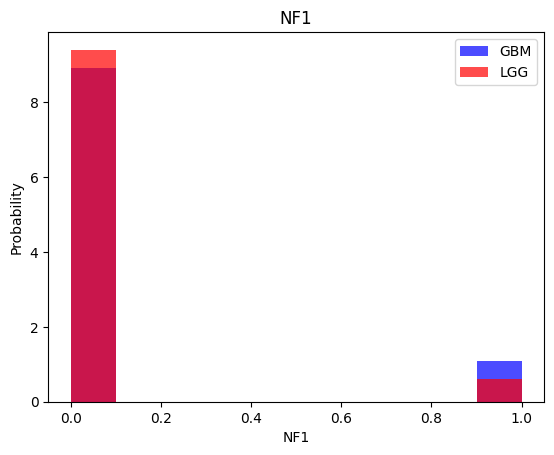

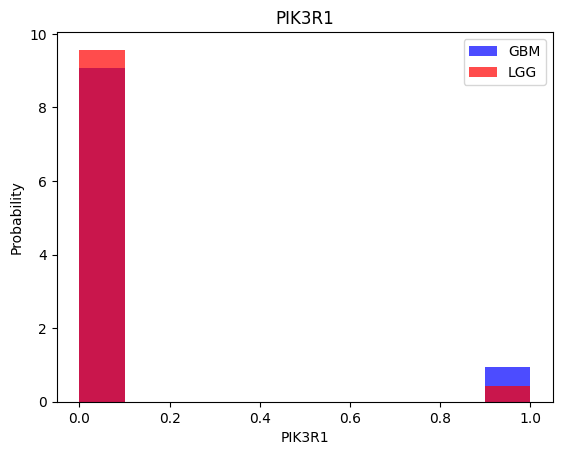

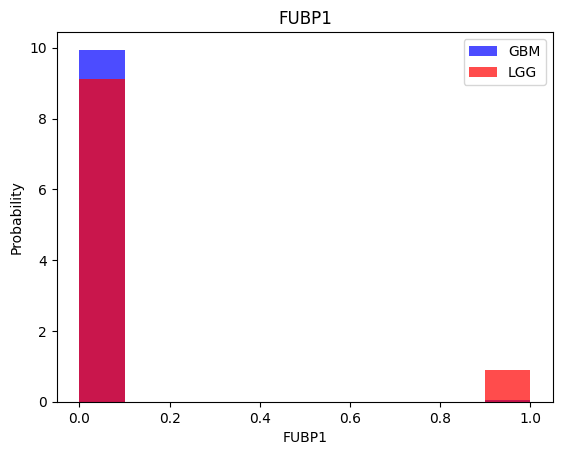

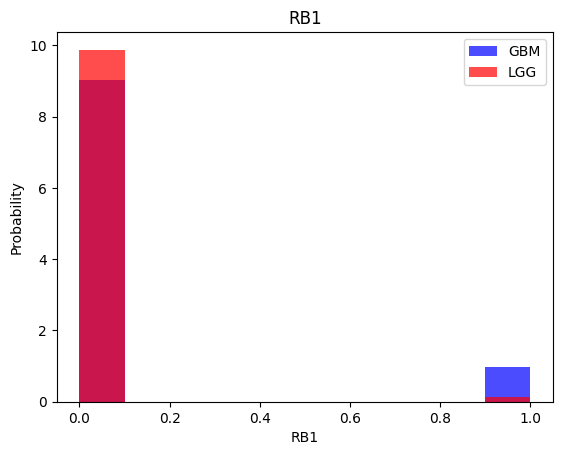

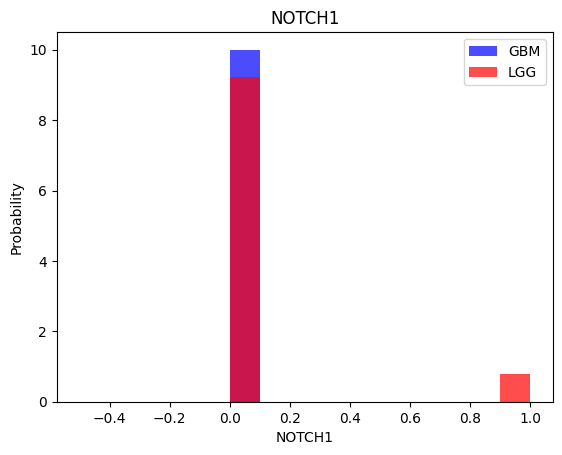

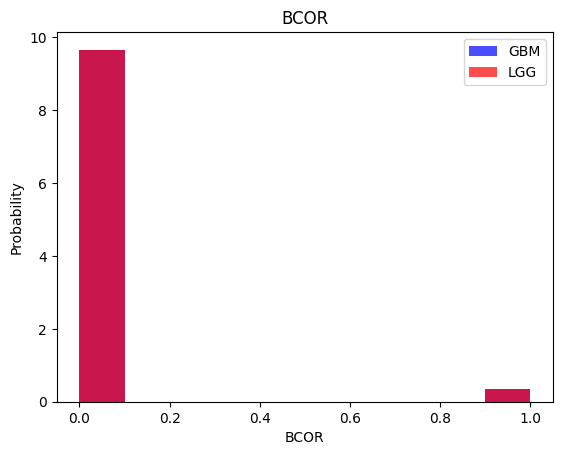

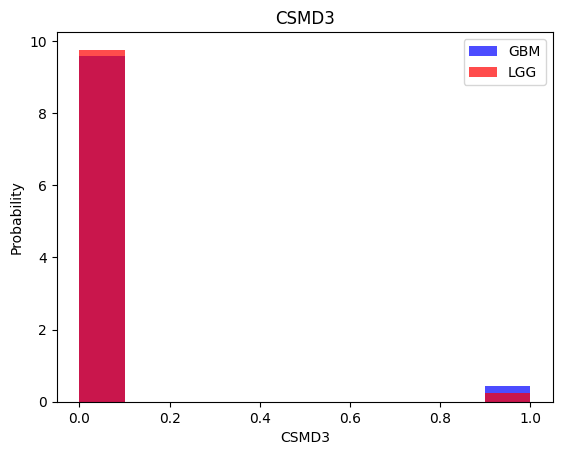

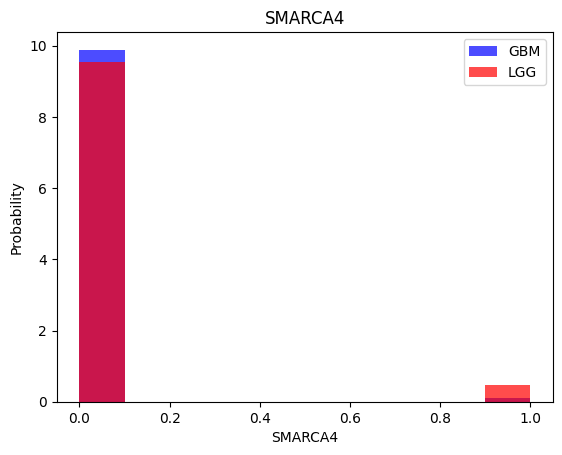

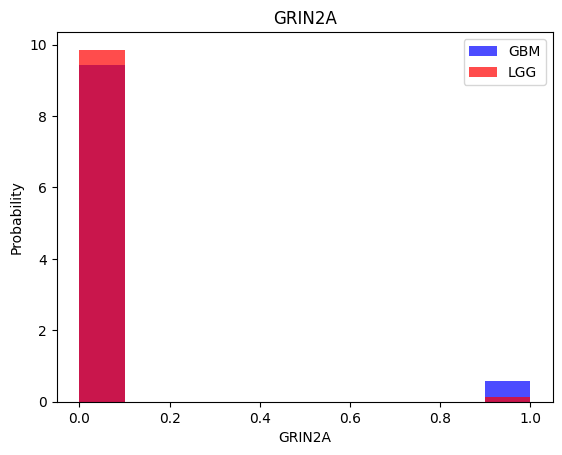

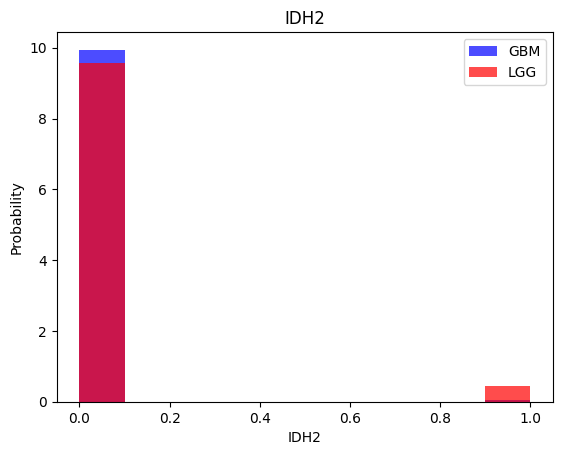

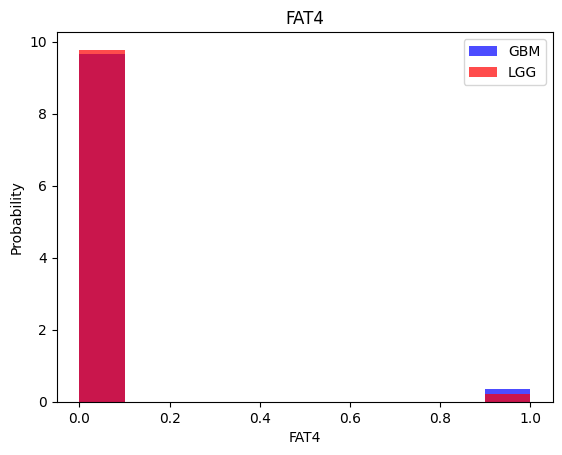

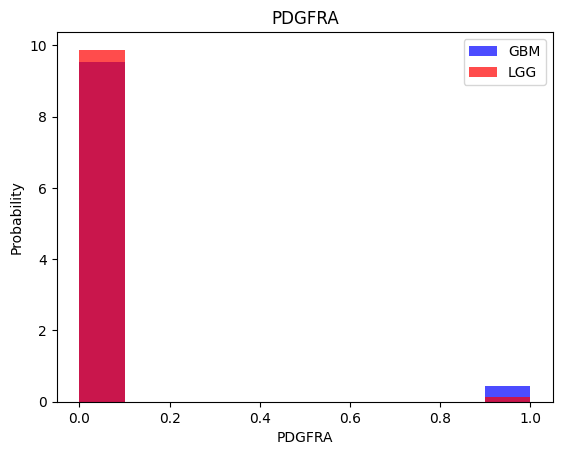

In [16]:
for label in cols:
  plt.hist(dataset[dataset['Grade']==1][label], color='blue', label='GBM', alpha=0.7, density=True)
  plt.hist(dataset[dataset['Grade']==0][label], color='red', label='LGG', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Train, Validation and Test

In [17]:
train, valid, test = np.split(dataset.sample(frac=1), [int(0.6*len(dataset)), int(0.8*len(dataset))])

## Data scalling and oversampliing

In [18]:
dataset['Grade'].value_counts()

0    487
1    352
Name: Grade, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [20]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [21]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## KNN Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn_model.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       103
           1       0.71      0.86      0.78        65

    accuracy                           0.81       168
   macro avg       0.80      0.82      0.81       168
weighted avg       0.83      0.81      0.81       168



## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [29]:
y_pred = nb_model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       103
           1       1.00      0.00      0.00        65

    accuracy                           0.61       168
   macro avg       0.81      0.50      0.38       168
weighted avg       0.76      0.61      0.47       168



In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Logistics Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [34]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       103
           1       0.76      0.94      0.84        65

    accuracy                           0.86       168
   macro avg       0.86      0.88      0.86       168
weighted avg       0.88      0.86      0.86       168



## SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [37]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       103
           1       0.75      0.94      0.84        65

    accuracy                           0.86       168
   macro avg       0.85      0.87      0.85       168
weighted avg       0.88      0.86      0.86       168



## Neural Net

In [38]:
import tensorflow as tf

In [39]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [42]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(22,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


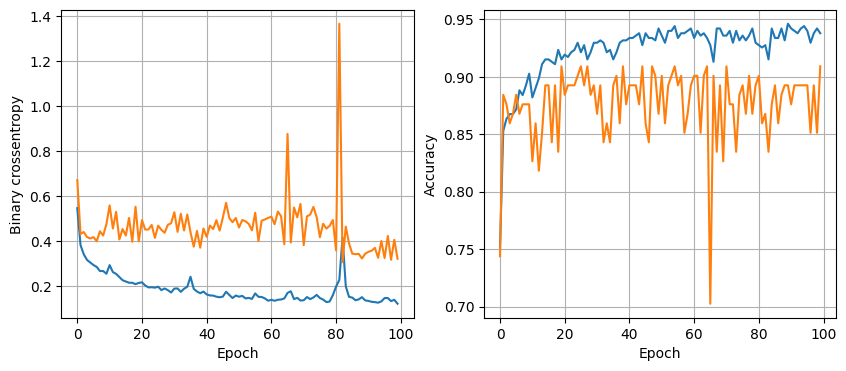

6/6 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.8214
16 nodes, dropout 0, lr 0.01, batch size 64


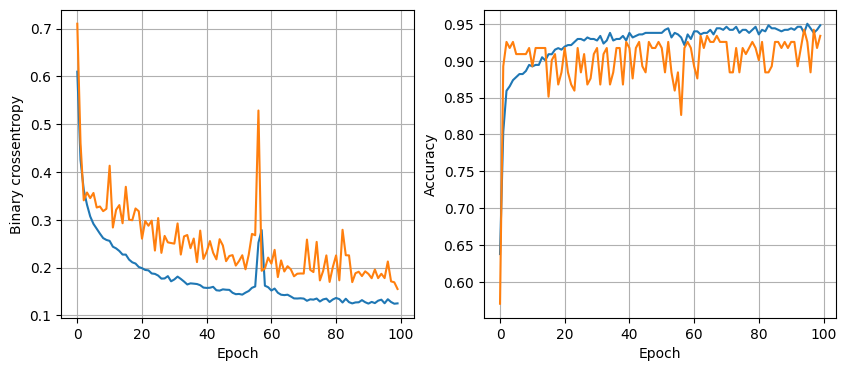

6/6 [==============================] - 0s 3ms/step - loss: 0.7740 - accuracy: 0.8452
16 nodes, dropout 0, lr 0.01, batch size 128


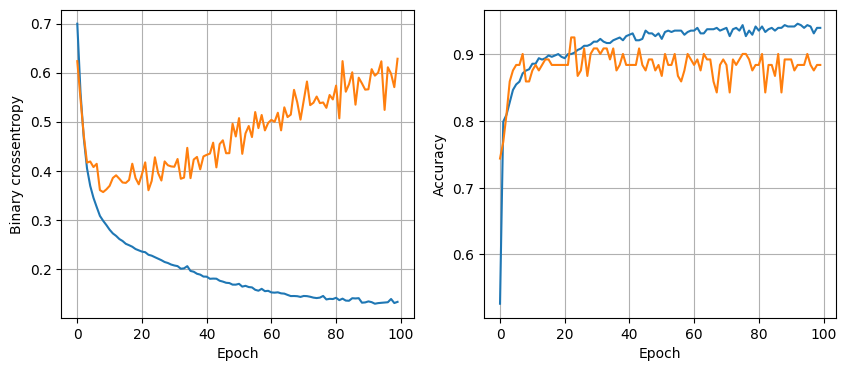

6/6 [==============================] - 0s 5ms/step - loss: 0.7557 - accuracy: 0.8274
16 nodes, dropout 0, lr 0.005, batch size 32


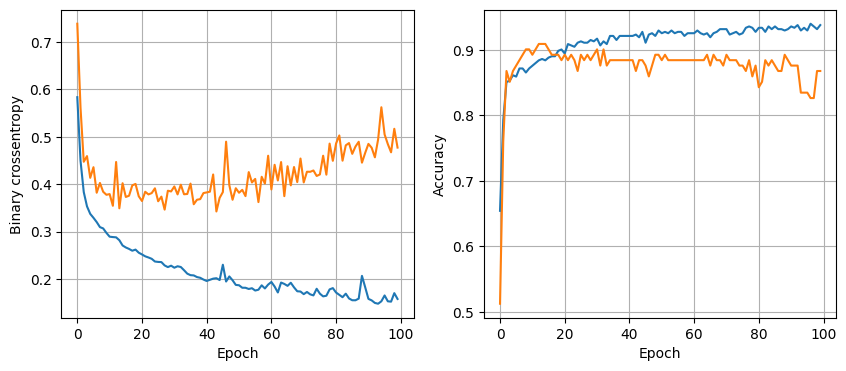

6/6 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.8214
16 nodes, dropout 0, lr 0.005, batch size 64


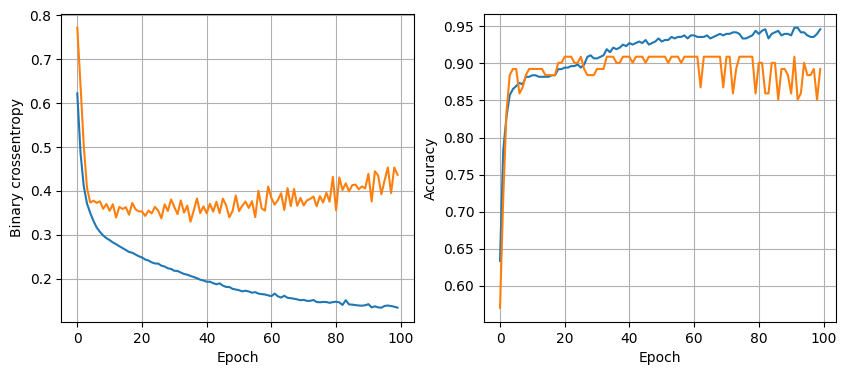

6/6 [==============================] - 0s 4ms/step - loss: 0.8216 - accuracy: 0.8393
16 nodes, dropout 0, lr 0.005, batch size 128


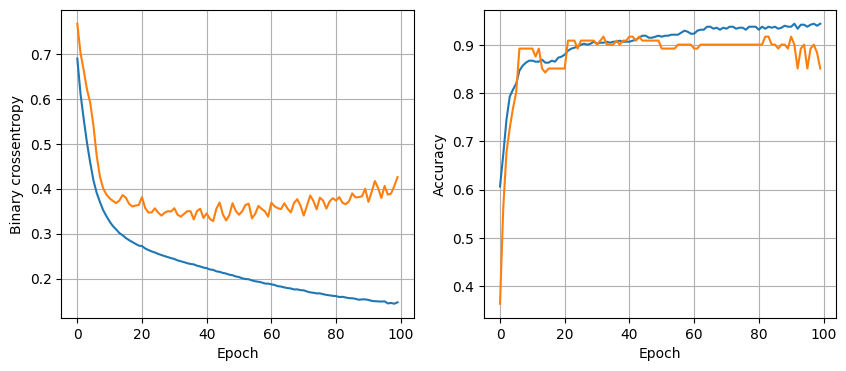

6/6 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.8274
16 nodes, dropout 0, lr 0.001, batch size 32


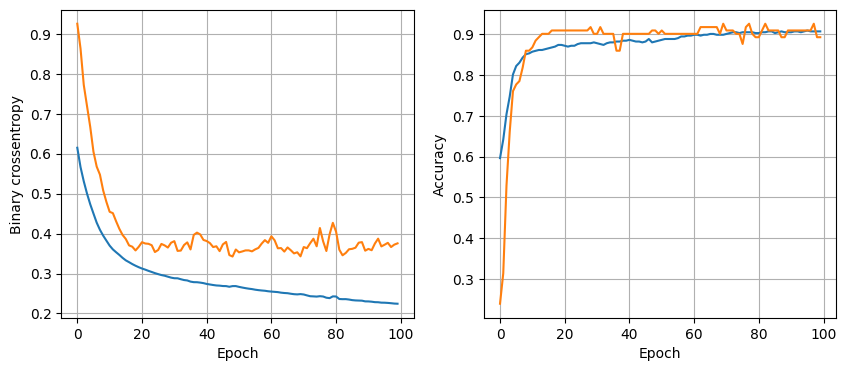

6/6 [==============================] - 0s 4ms/step - loss: 0.4496 - accuracy: 0.8333
16 nodes, dropout 0, lr 0.001, batch size 64


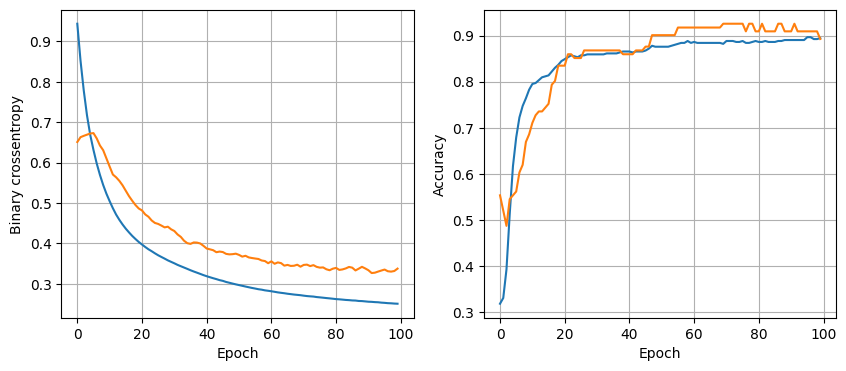

6/6 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.8690
16 nodes, dropout 0, lr 0.001, batch size 128


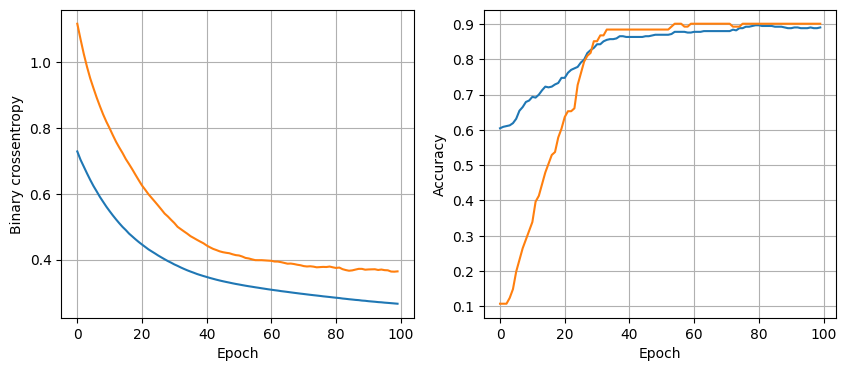

6/6 [==============================] - 0s 6ms/step - loss: 0.3464 - accuracy: 0.8750
16 nodes, dropout 0.2, lr 0.01, batch size 32


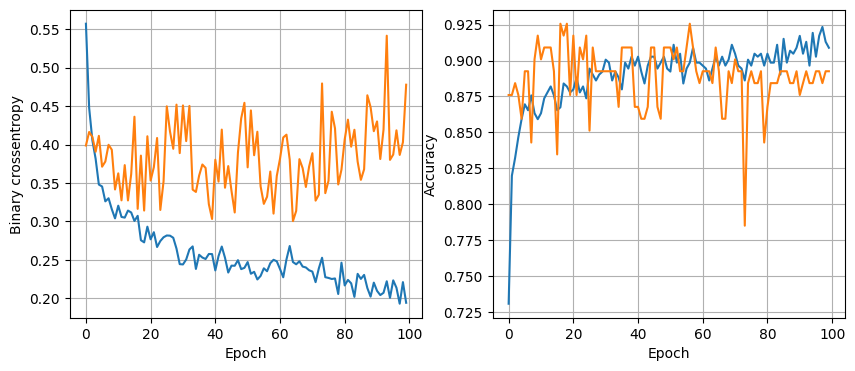

6/6 [==============================] - 0s 3ms/step - loss: 0.7291 - accuracy: 0.8452
16 nodes, dropout 0.2, lr 0.01, batch size 64


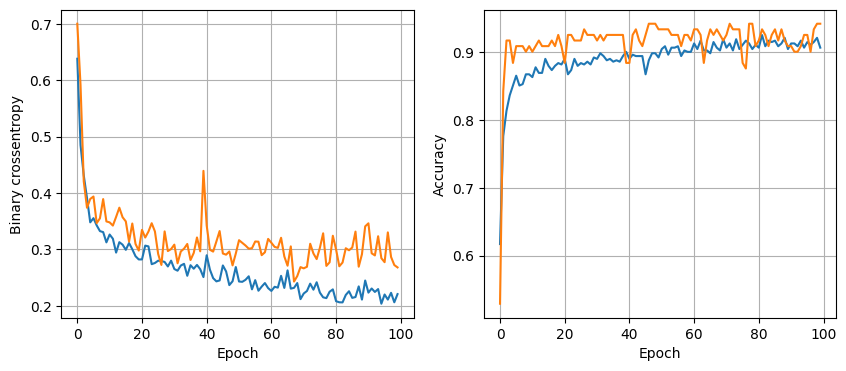

6/6 [==============================] - 0s 6ms/step - loss: 0.4979 - accuracy: 0.8631
16 nodes, dropout 0.2, lr 0.01, batch size 128


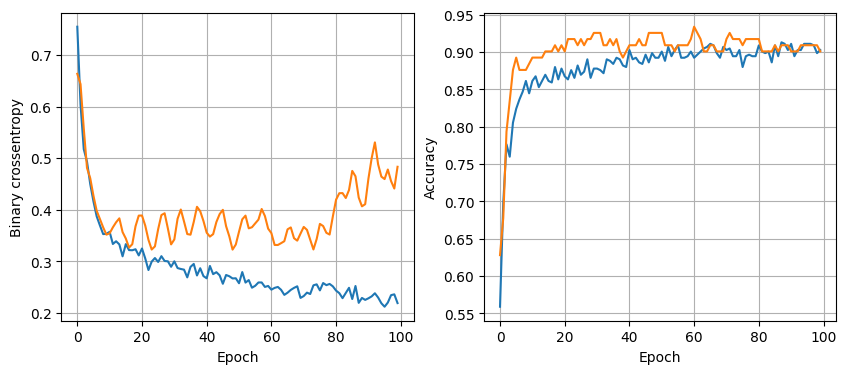

6/6 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.8571
16 nodes, dropout 0.2, lr 0.005, batch size 32


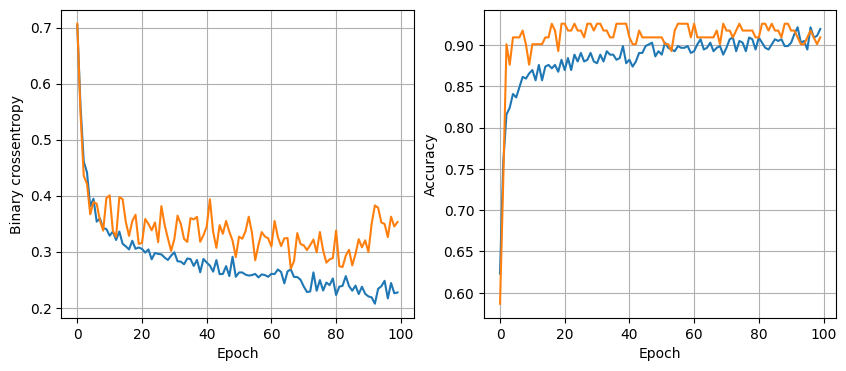

6/6 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8750
16 nodes, dropout 0.2, lr 0.005, batch size 64


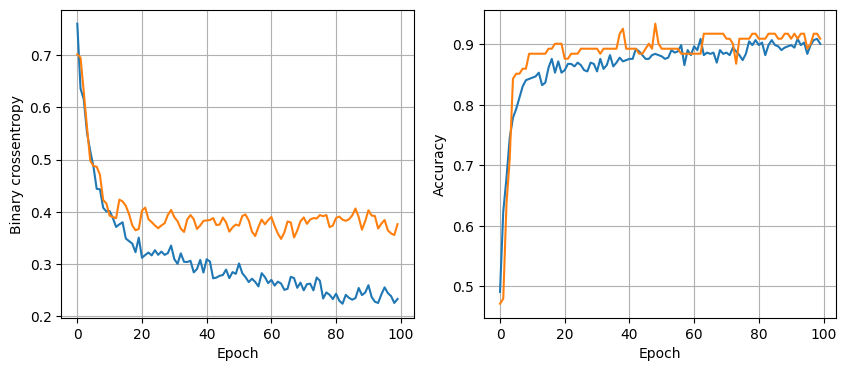

6/6 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.8690
16 nodes, dropout 0.2, lr 0.005, batch size 128


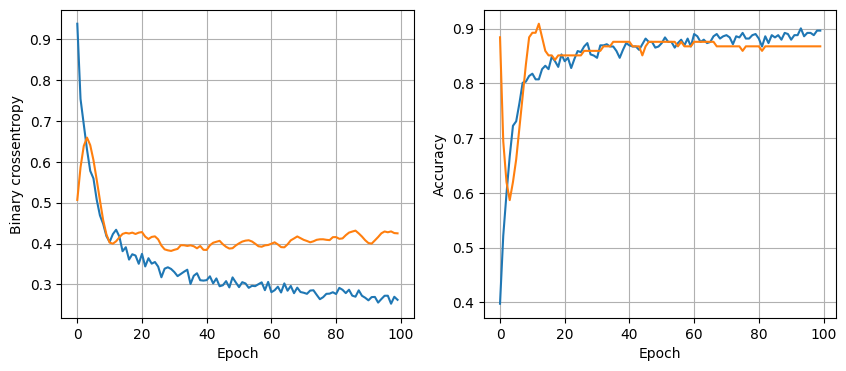

6/6 [==============================] - 0s 4ms/step - loss: 0.3966 - accuracy: 0.8810
16 nodes, dropout 0.2, lr 0.001, batch size 32


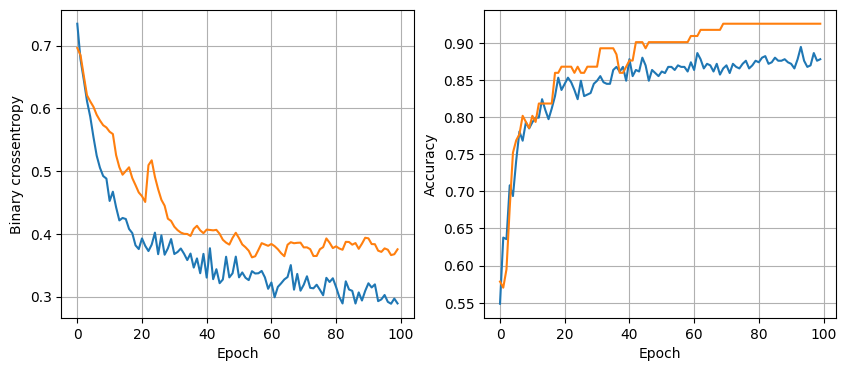

6/6 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.9167
16 nodes, dropout 0.2, lr 0.001, batch size 64


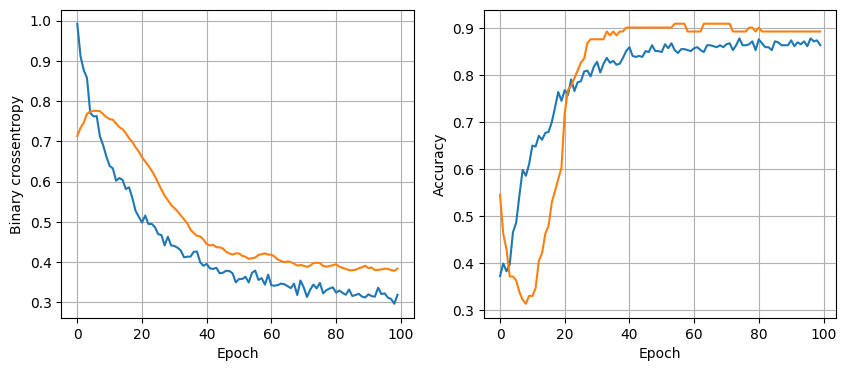

6/6 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8929
16 nodes, dropout 0.2, lr 0.001, batch size 128


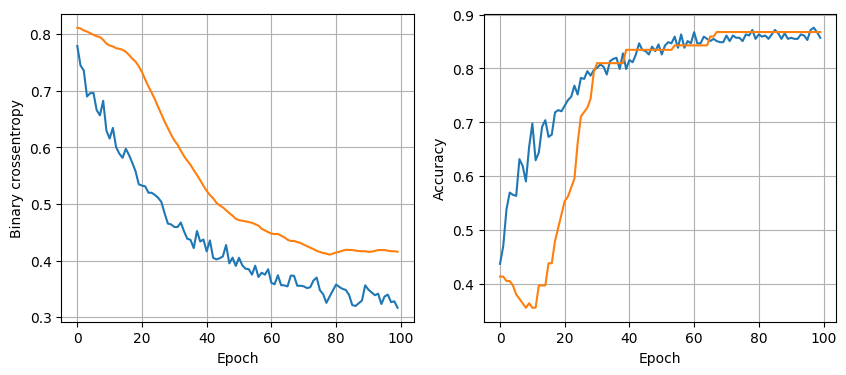

6/6 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8810
32 nodes, dropout 0, lr 0.01, batch size 32


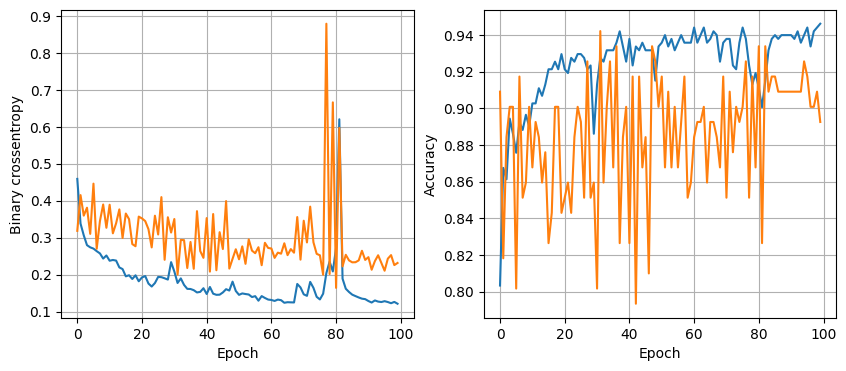

6/6 [==============================] - 0s 4ms/step - loss: 0.9236 - accuracy: 0.8393
32 nodes, dropout 0, lr 0.01, batch size 64


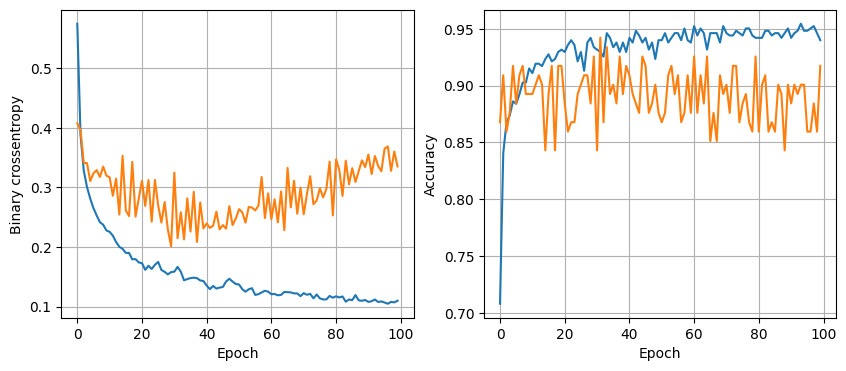

6/6 [==============================] - 0s 5ms/step - loss: 1.0841 - accuracy: 0.8274
32 nodes, dropout 0, lr 0.01, batch size 128


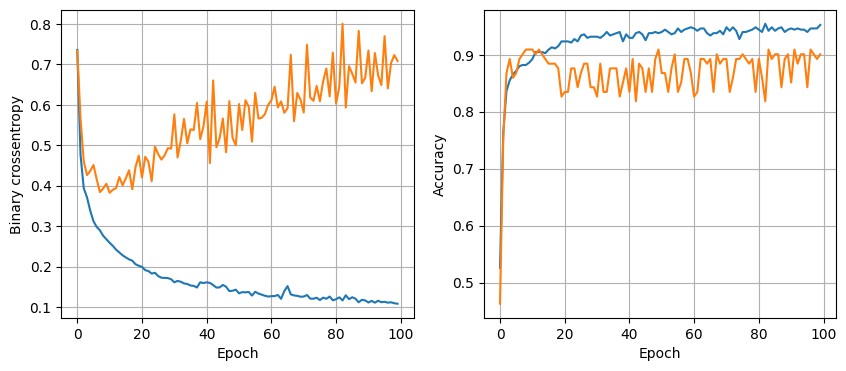

6/6 [==============================] - 0s 4ms/step - loss: 1.0220 - accuracy: 0.7976
32 nodes, dropout 0, lr 0.005, batch size 32


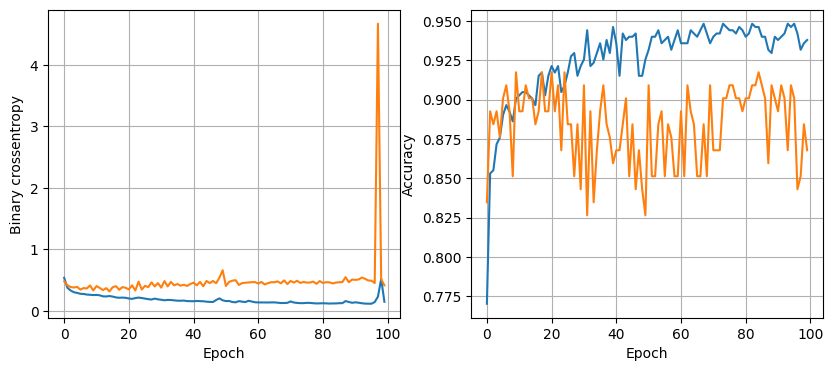

6/6 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.8393
32 nodes, dropout 0, lr 0.005, batch size 64


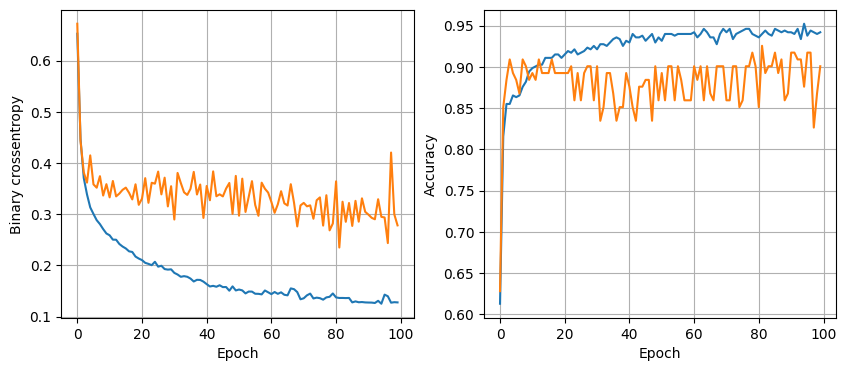

6/6 [==============================] - 0s 4ms/step - loss: 0.7893 - accuracy: 0.8274
32 nodes, dropout 0, lr 0.005, batch size 128


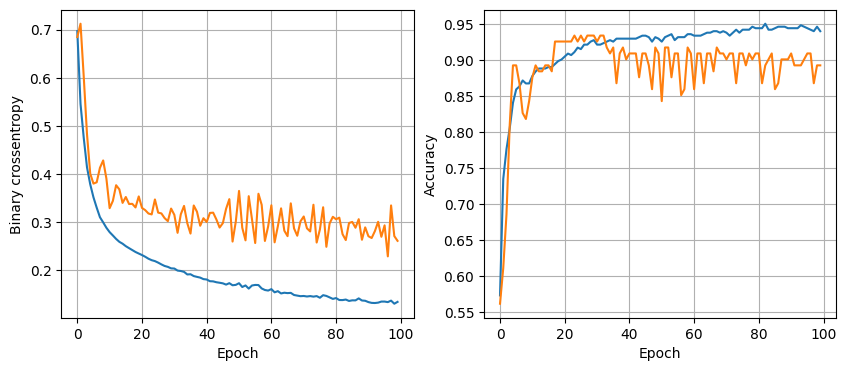

6/6 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.8333
32 nodes, dropout 0, lr 0.001, batch size 32


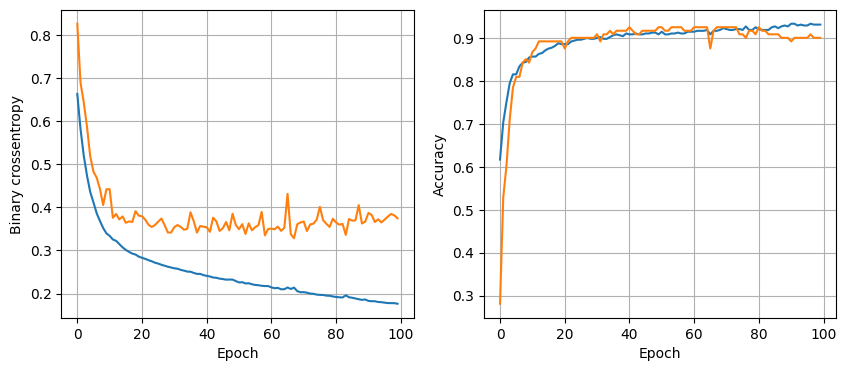

6/6 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8571
32 nodes, dropout 0, lr 0.001, batch size 64


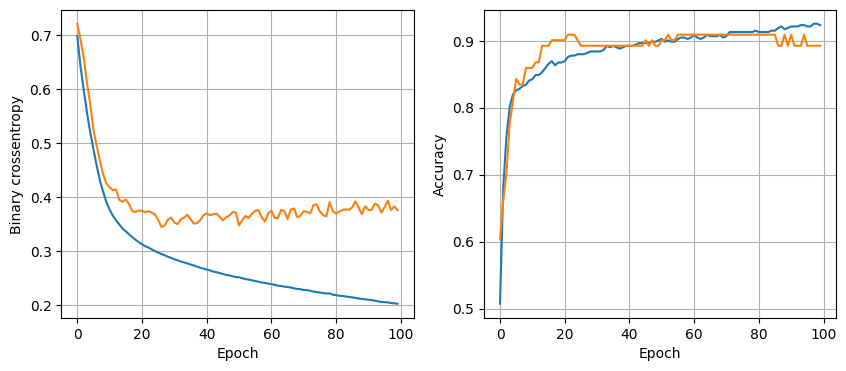

6/6 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8690
32 nodes, dropout 0, lr 0.001, batch size 128


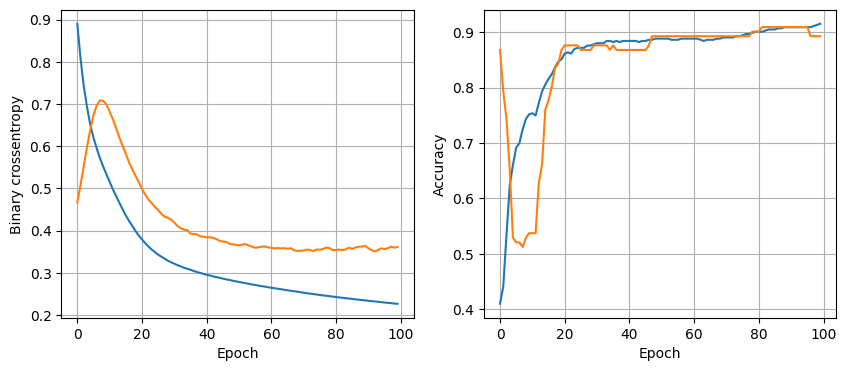

6/6 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.8810
32 nodes, dropout 0.2, lr 0.01, batch size 32


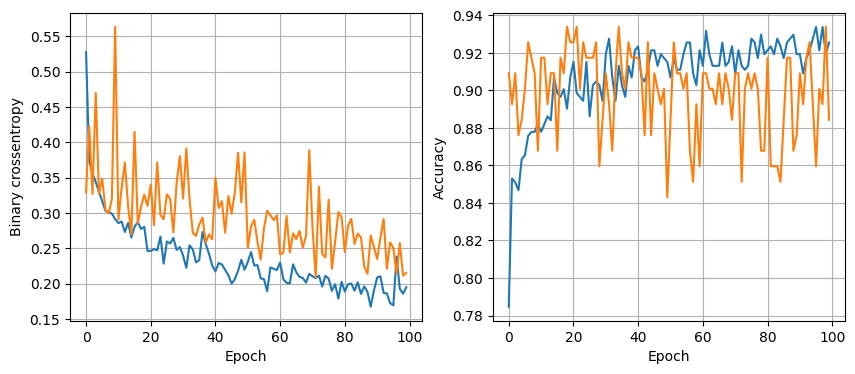

6/6 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.8571
32 nodes, dropout 0.2, lr 0.01, batch size 64


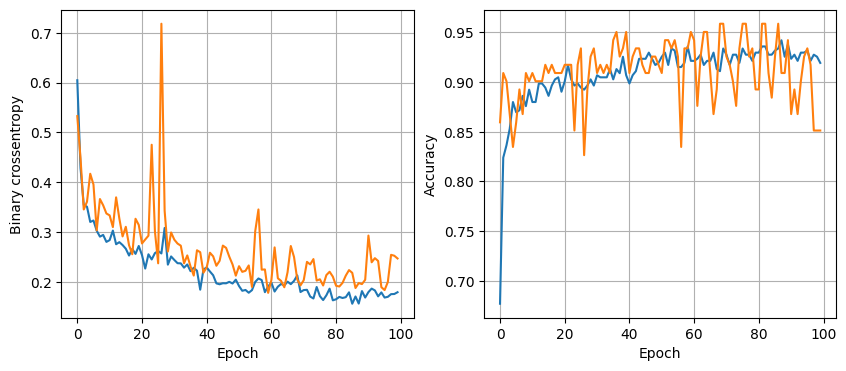

6/6 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.8393
32 nodes, dropout 0.2, lr 0.01, batch size 128


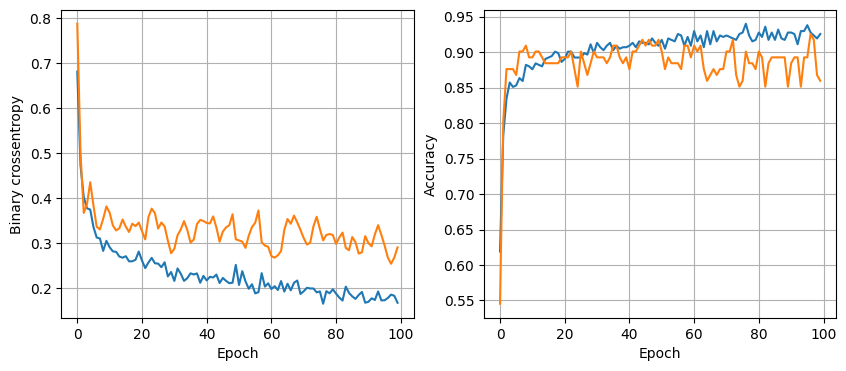

6/6 [==============================] - 0s 5ms/step - loss: 0.6152 - accuracy: 0.8393
32 nodes, dropout 0.2, lr 0.005, batch size 32


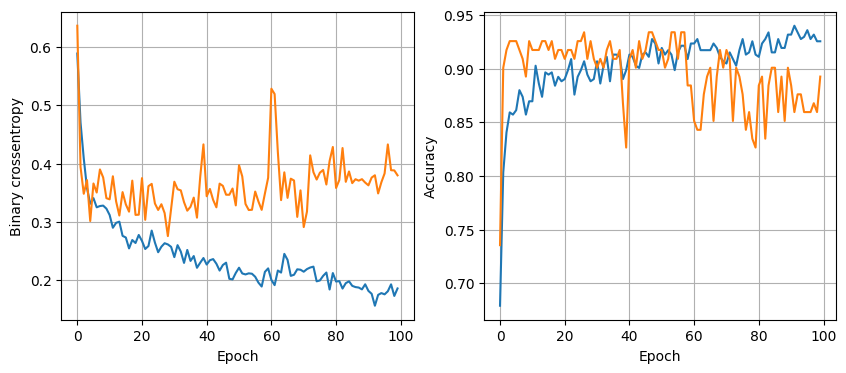

6/6 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.8036
32 nodes, dropout 0.2, lr 0.005, batch size 64


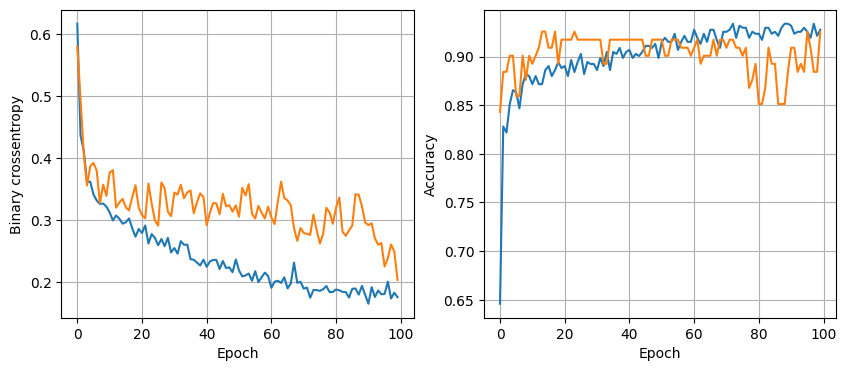

6/6 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.8512
32 nodes, dropout 0.2, lr 0.005, batch size 128


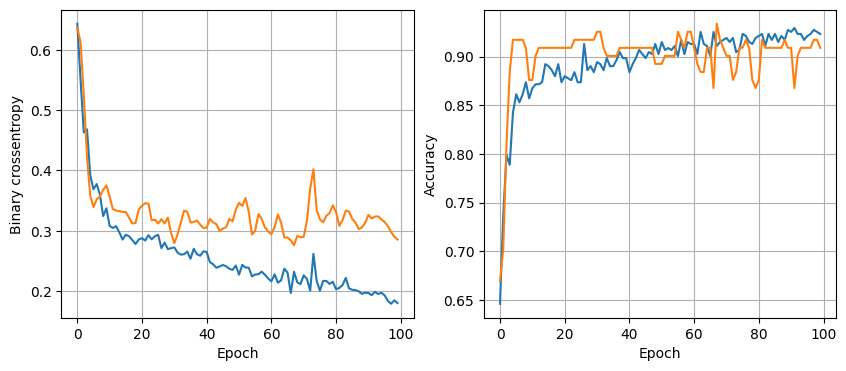

6/6 [==============================] - 0s 4ms/step - loss: 0.5475 - accuracy: 0.8571
32 nodes, dropout 0.2, lr 0.001, batch size 32


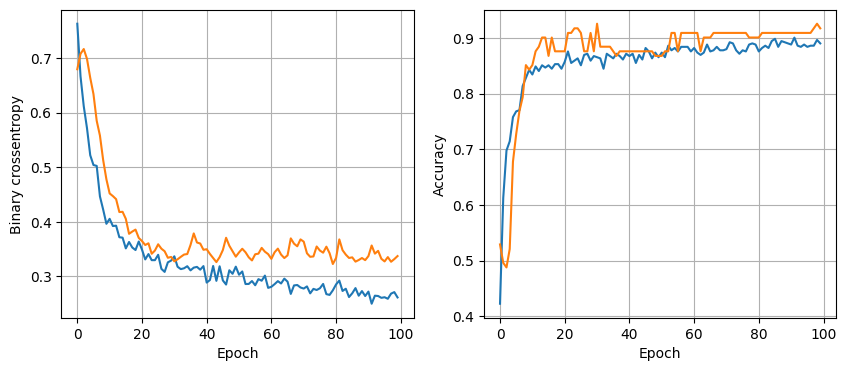

6/6 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8690
32 nodes, dropout 0.2, lr 0.001, batch size 64


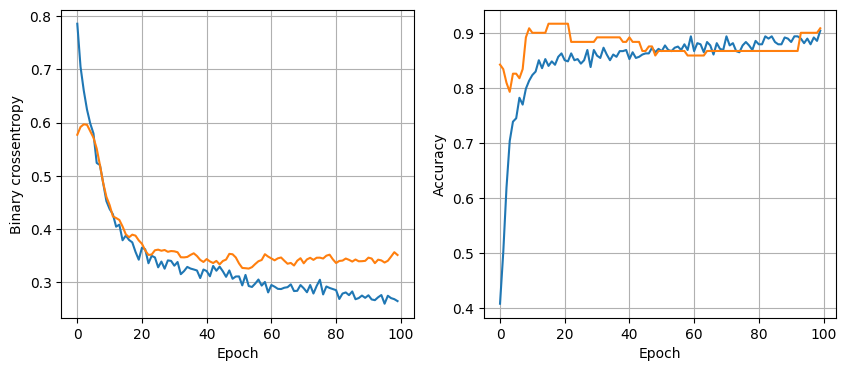

6/6 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.8929
32 nodes, dropout 0.2, lr 0.001, batch size 128


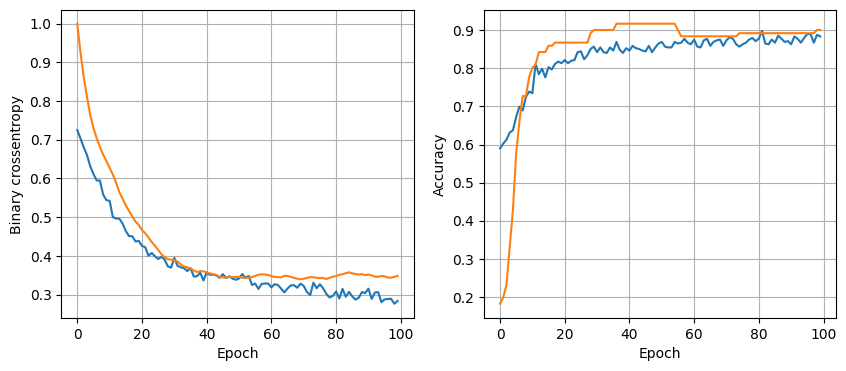

6/6 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.8929
64 nodes, dropout 0, lr 0.01, batch size 32


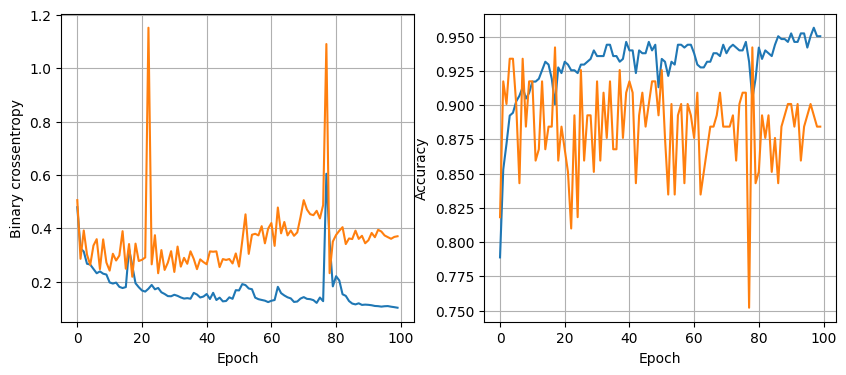

6/6 [==============================] - 0s 4ms/step - loss: 0.9016 - accuracy: 0.8631
64 nodes, dropout 0, lr 0.01, batch size 64


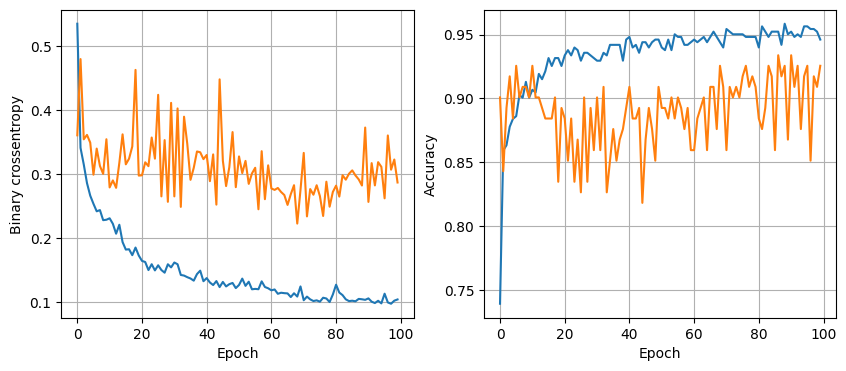

6/6 [==============================] - 0s 4ms/step - loss: 1.0389 - accuracy: 0.8274
64 nodes, dropout 0, lr 0.01, batch size 128


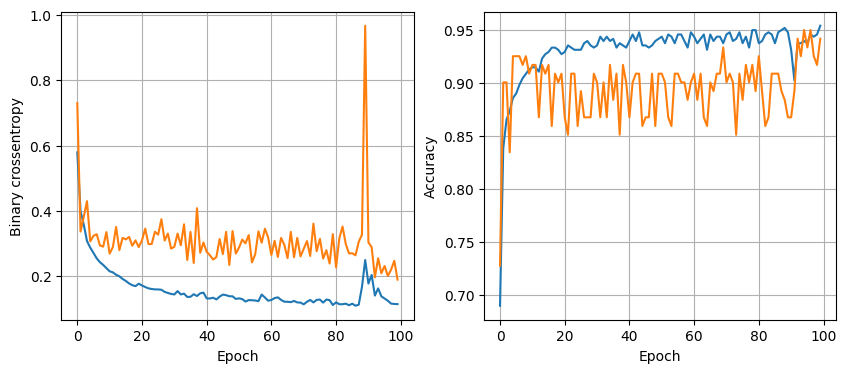

6/6 [==============================] - 0s 3ms/step - loss: 0.7957 - accuracy: 0.8690
64 nodes, dropout 0, lr 0.005, batch size 32


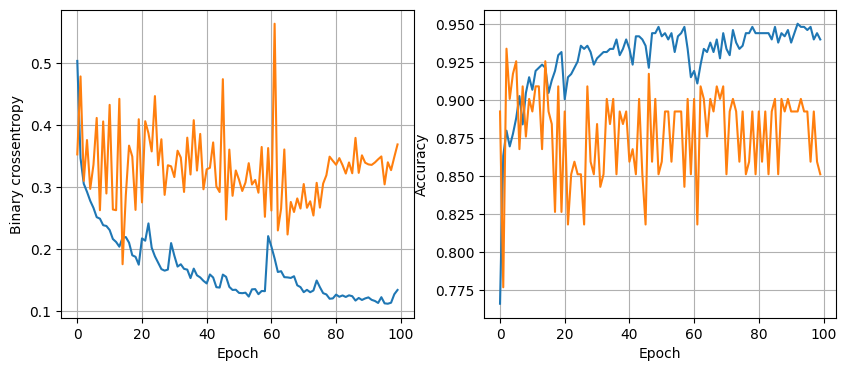

6/6 [==============================] - 0s 4ms/step - loss: 0.8712 - accuracy: 0.8512
64 nodes, dropout 0, lr 0.005, batch size 64


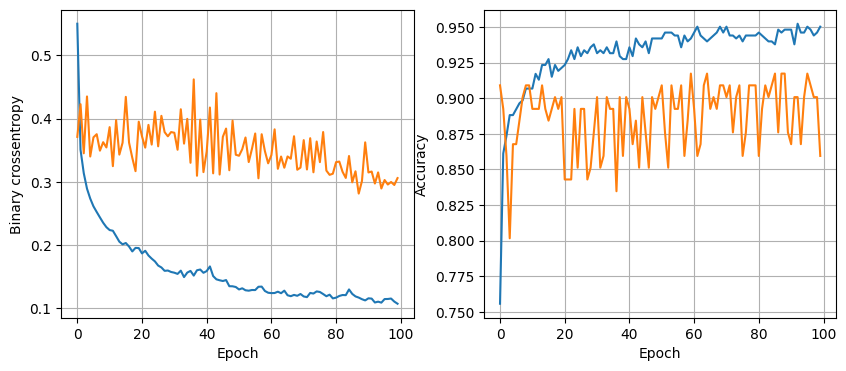

6/6 [==============================] - 0s 4ms/step - loss: 0.7946 - accuracy: 0.8333
64 nodes, dropout 0, lr 0.005, batch size 128


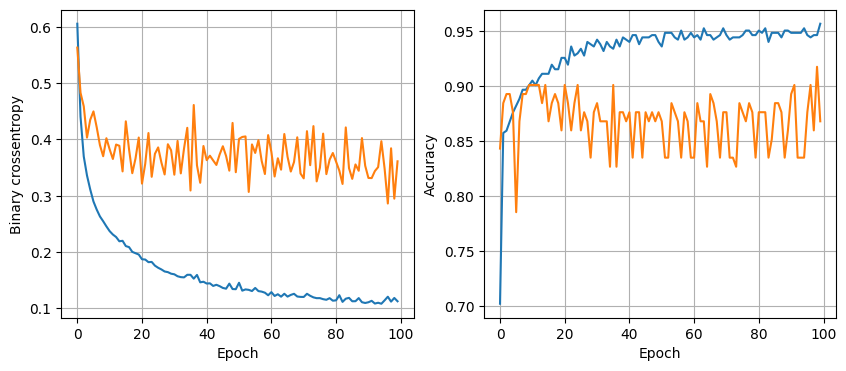

6/6 [==============================] - 0s 4ms/step - loss: 0.8347 - accuracy: 0.8452
64 nodes, dropout 0, lr 0.001, batch size 32


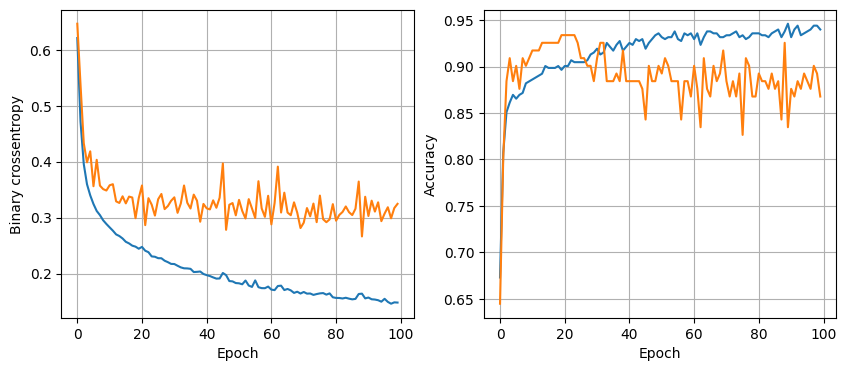

6/6 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.8393
64 nodes, dropout 0, lr 0.001, batch size 64


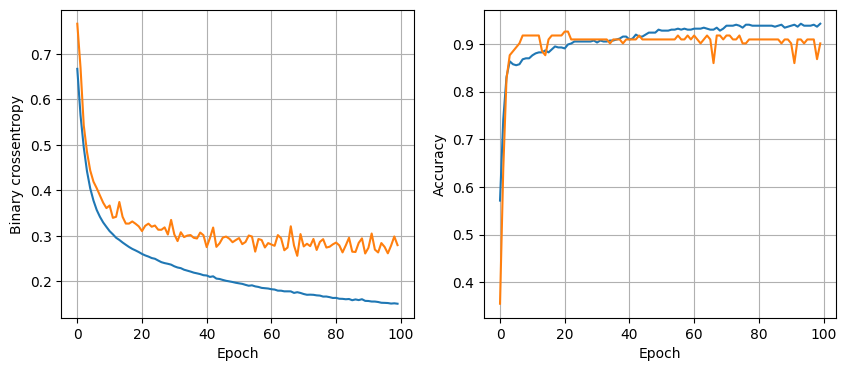

6/6 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.8393
64 nodes, dropout 0, lr 0.001, batch size 128


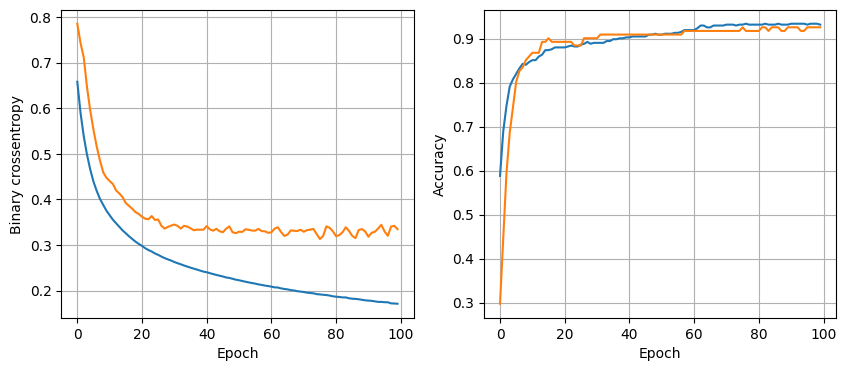

6/6 [==============================] - 0s 6ms/step - loss: 0.4387 - accuracy: 0.8452
64 nodes, dropout 0.2, lr 0.01, batch size 32


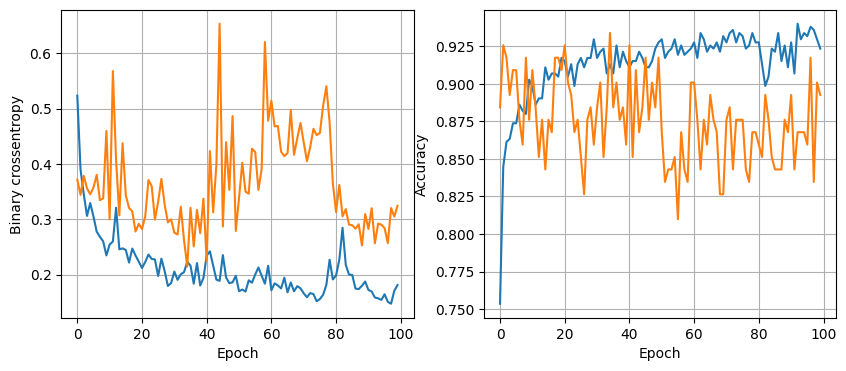

6/6 [==============================] - 0s 3ms/step - loss: 1.0041 - accuracy: 0.8393
64 nodes, dropout 0.2, lr 0.01, batch size 64


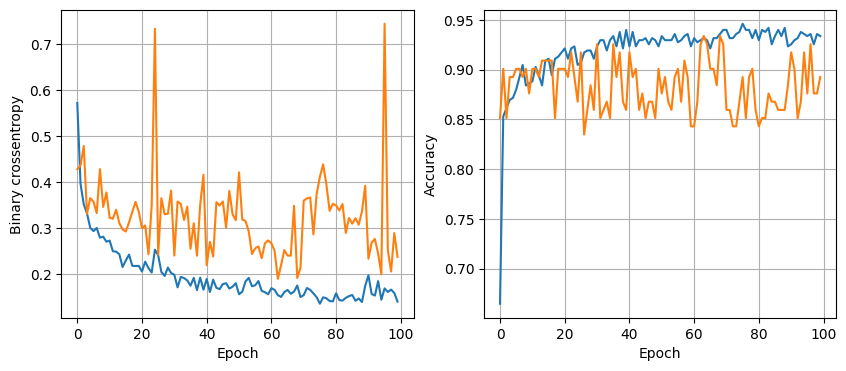

6/6 [==============================] - 0s 4ms/step - loss: 0.8506 - accuracy: 0.8452
64 nodes, dropout 0.2, lr 0.01, batch size 128


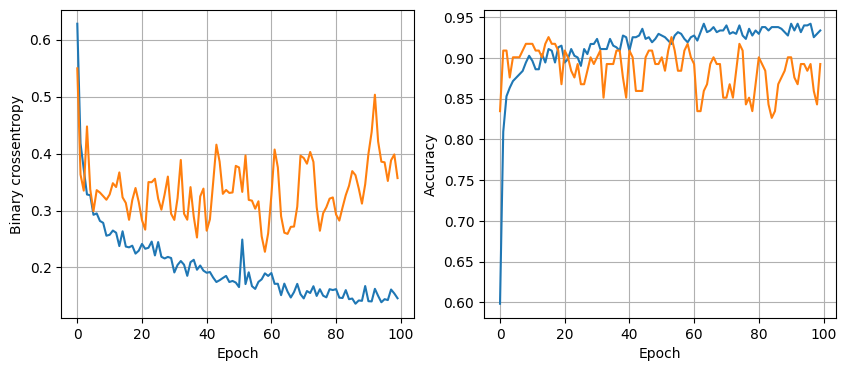

6/6 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.8214
64 nodes, dropout 0.2, lr 0.005, batch size 32


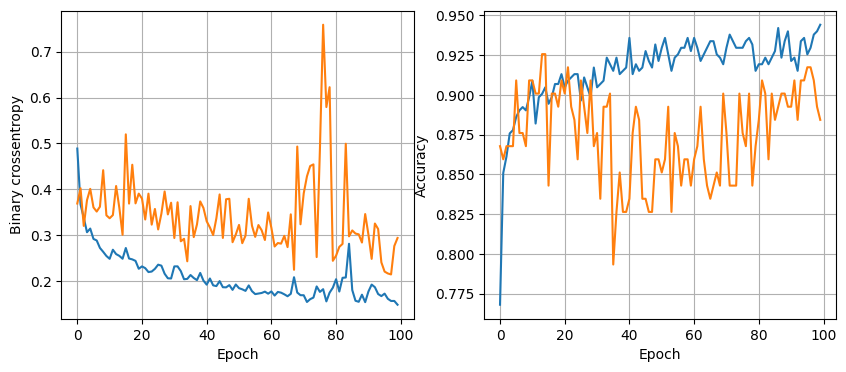

6/6 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.8333
64 nodes, dropout 0.2, lr 0.005, batch size 64


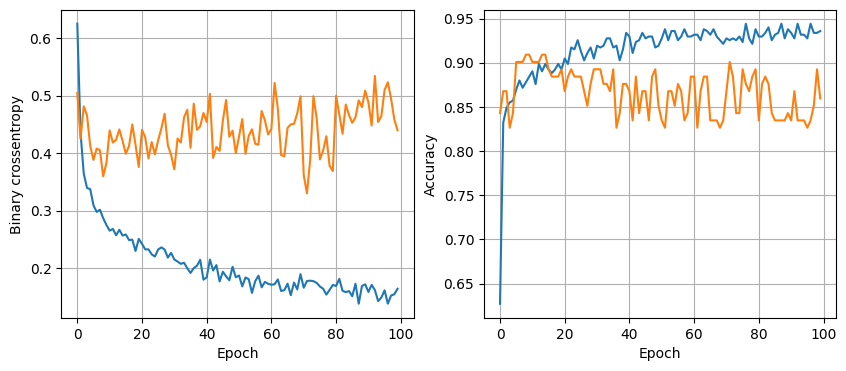

6/6 [==============================] - 0s 4ms/step - loss: 0.7545 - accuracy: 0.8274
64 nodes, dropout 0.2, lr 0.005, batch size 128


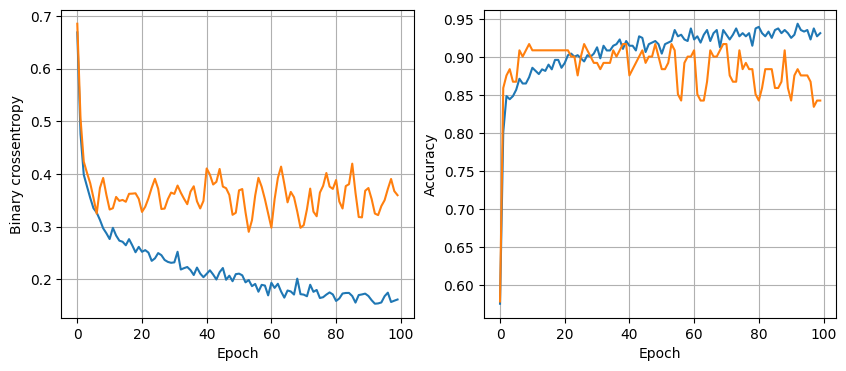

6/6 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.8333
64 nodes, dropout 0.2, lr 0.001, batch size 32


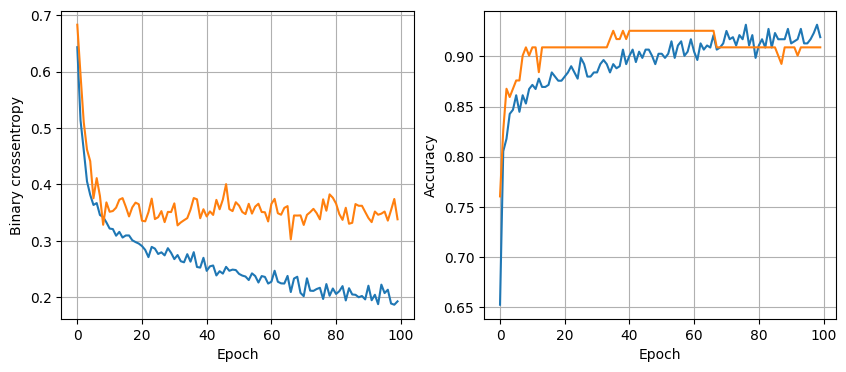

6/6 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8393
64 nodes, dropout 0.2, lr 0.001, batch size 64


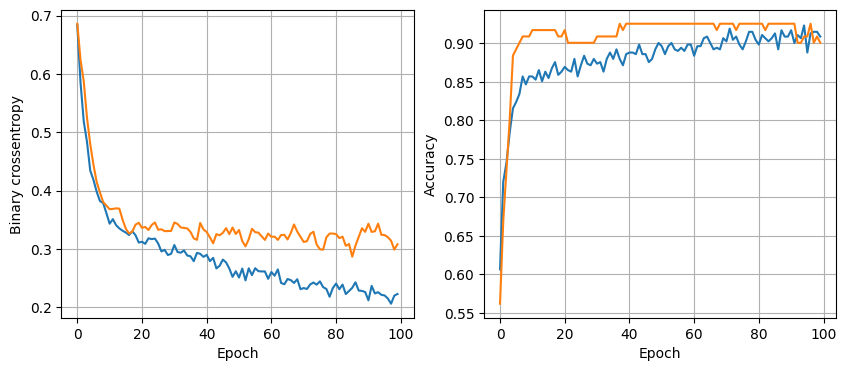

6/6 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8631
64 nodes, dropout 0.2, lr 0.001, batch size 128


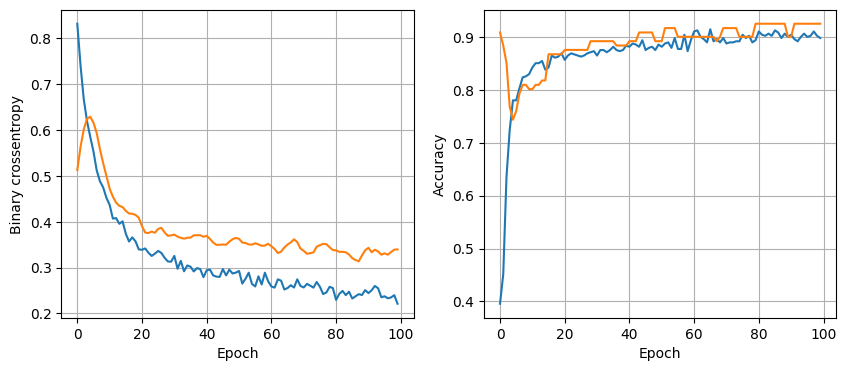

6/6 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8571


In [43]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [44]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

6/6 [==============================] - 0s 3ms/step


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       103
           1       0.77      0.89      0.83        65

    accuracy                           0.86       168
   macro avg       0.85      0.86      0.85       168
weighted avg       0.87      0.86      0.86       168

